# Task 2.4 (b) Section 2 - Validation

Plot α for the test data versus the corresponding predicted α values on a log-log plot to evaluate the agreement. Also determined the rms deviation between the predictions and this collection of test data.

In [52]:
# Import useful packages
import json # Package for loading data
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# ==================================================
# Loading data from Task 2.3 (a) Section 1 Data Prep
# ==================================================
# Load normalized data for xdata, ydata, and median values
with open("n_xdata_test.json", "r") as xdata_file:
    n_xdata_dict = json.load(xdata_file)
with open("n_ydata_test.json", "r") as ydata_file:
    n_ydata_dict = json.load(ydata_file)
with open("x_medians.json", "r") as x_medians_file:
    x_medians_dict = json.load(x_medians_file)    
with open("y_medians.json", "r") as y_medians_file:
    y_medians_dict = json.load(y_medians_file)
    
# Access the data from the dictionaries
xdata_test = n_xdata_dict["data"]
ydata_test = n_ydata_dict["data"]
x_medians = x_medians_dict["data"]
y_medians = y_medians_dict["data"]

# T1 [Kelvins], gamma, Qs [kW]:
xarray_test = np.array(xdata_test)
# Alpha, EffSys:
yarray_test = np.array(ydata_test)

# Assign meadian values of input variables
Tmed = x_medians[0]
gamed = x_medians[1]
qsmed = x_medians[2]

# Assign meadian values of output variables
almed = y_medians[0]
efmed = y_medians[1]

# Print data for verification
# print(xdata_test)
# print(xarray_test)
# print(ydata_test)
# print(yarray_test)

# =======================================
# Loading trained model from Task 2.2 (b)
# =======================================
model = tf.keras.models.load_model("model_case_5_run_6.h5")
# Back Propagation Neural Network (BPNN) loaded

# ================================
# Model predictions from test data
# ================================
# Denormalized ydata set
yarray_test = yarray_test*y_medians
# Obtaining predictions from model
predictions = model.predict(xdata_test)
# Denormalized predictions
predictions = predictions*y_medians

# =======================================
# RMSE calculations of predicted vs. data
# =======================================
rmse_alpha = np.sqrt(np.mean(np.square(yarray_test[:,0] - predictions[:,0])))
rmse_eff = np.sqrt(np.mean(np.square(yarray_test[:,1] - predictions[:,1])))

print("RMSE for Alpha:", rmse_alpha)
print("RMSE for Eff:", rmse_eff)


1/1 [==============================] - 0s 32ms/step
RMSE for Alpha: 4.842591006072719
RMSE for Eff: 0.020972120631378207


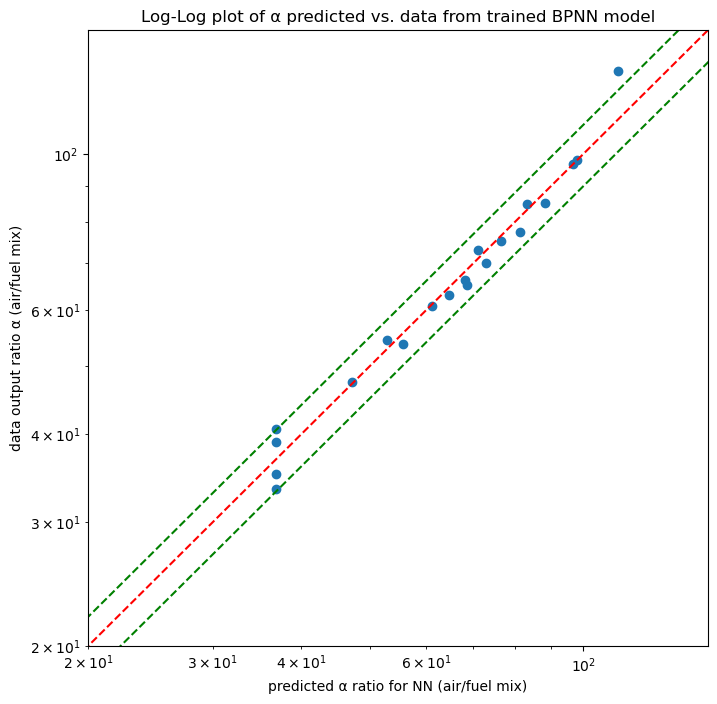

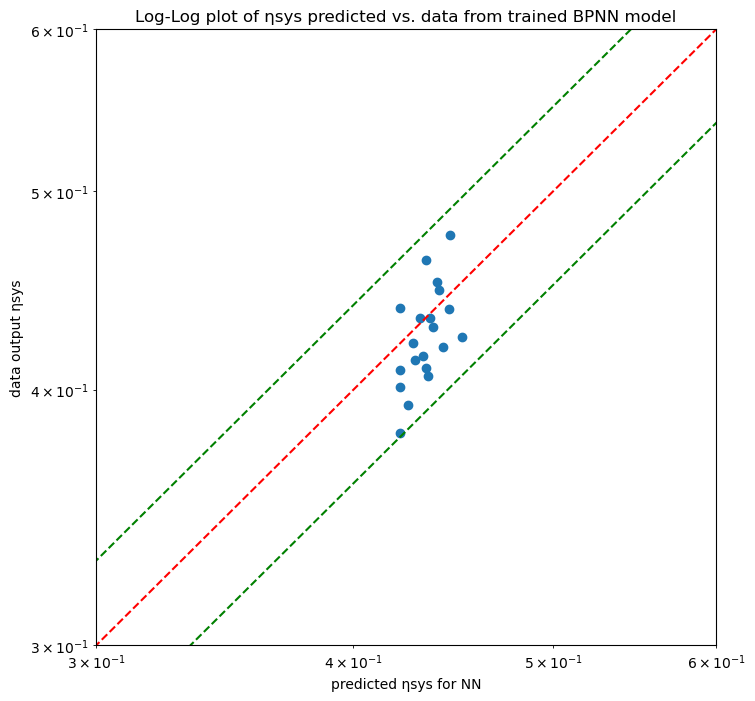

In [53]:
# Log-Log Plots
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt    

# Figure size set up
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas 

# log-log plot for output values of alpha

# Adding y=k*x for k=1
x_values = np.logspace(0, 3, 100)   # Adjust the range of x values as needed
y_values = x_values                     # y = k*x
y_values1 = x_values + (0.1 * x_values) # y = k*x + 0.1*x (+10% uncertainty)
y_values2 = x_values - (0.1 * x_values) # y = k*x - 0.1*x (-10% uncertainty)
plt.plot(x_values, y_values1, color='green', linestyle='--', label='y = k*x + 0.1*x')
plt.plot(x_values, y_values2, color='green', linestyle='--', label='y = k*x - 0.1*x')

plt.scatter(predictions[:, 0], yarray_test[:, 0])
plt.title('Log-Log plot of α predicted vs. data from trained BPNN model')
plt.xlabel('predicted α ratio for NN (air/fuel mix)') 
plt.ylabel('data output ratio α (air/fuel mix)')
plt.loglog()
plt.xlim(xmax = 150, xmin = 20)
plt.ylim(ymax = 150, ymin = 20)
# Generate red y=x line
x_data = np.linspace(10, 200, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red', linestyle='--')
plt.show()

# log-log plot for output values of ηsys

# Adding y=k*x for k=1
x_values = np.logspace(-1, 3, 100)   # Adjust the range of x values as needed
y_values = x_values                     # y = k*x
y_values1 = x_values + (0.1 * x_values) # y = k*x + 0.1*x (+10% uncertainty)
y_values2 = x_values - (0.1 * x_values) # y = k*x - 0.1*x (-10% uncertainty)
plt.plot(x_values, y_values1, color='green', linestyle='--', label='y = k*x + 0.1*x')
plt.plot(x_values, y_values2, color='green', linestyle='--', label='y = k*x - 0.1*x')

plt.scatter(predictions[:, 1], yarray_test[:, 1])
plt.title('Log-Log plot of ηsys predicted vs. data from trained BPNN model')
plt.xlabel('predicted ηsys for NN') 
plt.ylabel('data output ηsys')
plt.loglog()
plt.xlim(xmax = 0.6, xmin = 0.3)
plt.ylim(ymax = 0.6, ymin = 0.3)
# Generate red y=x line
x_data = np.linspace(0, 1, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red', linestyle='--')
plt.show()
